# Get top Video Games through Web Scraping, a raw file and an API.


### ABSTRACT


We are working on a video game dataset and will be extracting video game data from 3 different data sources and then will be munging them together to form a consistent dataset. We will perform several operations over the dataset extracted to make the data clean and error free and consistent. After that we will be developing a database from using the extracted source data and display it in the form of an Entity-Relationship Diagram.
The dataset used is the vgchartz.com. It contains details about Video Game ratings, genres, publisher, year of release, description.

### DATA                                                                                                    
Data gathered is from all the three sources are as follows. Data consists of                                                
Id     

Name     

Description   

Genre

Publisher

Year

Platform

RAWG Score

Critic_Score                                                                      

## Importing Libraries

In [1]:
import requests
import pandas as pd
import json
import os
import rawgpy
from bs4 import BeautifulSoup
import numpy as np

### DATA SOURCE 1: Using Web Scraping using Beautiful Soup

### What is Beautiful Soup?

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


### The site we are going to use is http://www.vgchartz.com/gamedb/games.php?name=&keyword=&console=&region=All&developer=&publisher=&goty_year=&genre=&boxart=Both&banner=Both&ownership=Both&showmultiplat=Yes&results=200&order=Sales&showtotalsales=0&showpublisher=0&showpublisher=1&showvgchartzscore=0&shownasales=0&showdeveloper=0&showcriticscore=0&showpalsales=0&showreleasedate=0&showuserscore=0&showjapansales=0&showlastupdate=0&showothersales=0&showshipped=0. Please visit the link to get information on what is being scrapped.



In [2]:
# Fetching the tags from the website
url = 'http://www.vgchartz.com/gamedb/games.php?name=&keyword=&console=&region=All&developer=&publisher=&goty_year=&genre=&boxart=Both&banner=Both&ownership=Both&showmultiplat=Yes&results=200&order=Sales&showtotalsales=0&showpublisher=0&showpublisher=1&showvgchartzscore=0&shownasales=0&showdeveloper=0&showcriticscore=0&showpalsales=0&showreleasedate=0&showuserscore=0&showjapansales=0&showlastupdate=0&showothersales=0&showshipped=0'
html = requests.get(url, headers = {'User-Agent':'Mozilla/5.0'})
print(html.status_code) 
# Printing the status code, 200 means the request has succeeded

200


In [3]:
#Displaying the above format to more readable format using html parser
soup = BeautifulSoup(html.content, 'html.parser')
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html>

<html lang="en">
<head>
<!-- VGCHARTZ MAIN HEADER TAGS -->
<!-- Venatus Market Ad-Manager (vgchartz.com) -->
<script>
    (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
    </script>
<!-- / Venatus Market Ad-Manager (vgchartz.com) -->
<meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
<script src="http://www.google-analytics.com/urchin.js" type="text/javascript"></script>
<script type="text/java

In [4]:
# We will be extracting Rank, Name, Platform and Publisher from vgchartz.com 
k=[] 
rank=[]
gname=[]
publisher=[]
platform=[]
release_date=[]
# Retrieving values using a for loop
for tag in soup.find_all('a'):
    if tag['href'].startswith('http://www.vgchartz.com/game/'):
        k.append(tag.get_text().strip())
        data=tag.parent.parent.find_all('td')
        if data!=[]:
            rank.append(np.int32(data[0].string))
            platform.append(data[3].find('img').attrs['alt'].strip(' '))
            publisher.append(data[4].string.strip(' '))
gname = k[10:] # Our data starts from index position 10 onwards
# Creating a dictionary to store the column names for the dataframe
columns = {
    'Id': rank,
    'Name':gname,
    'Platform':platform,
    'Publisher':publisher
}
df = pd.DataFrame(columns) # Creating a dataframe with column names Rank, Name, Platform and Publisher.
df = df[[
    'Id', 'Name', 'Platform',
    'Publisher']]
# Saving the obtained dataframe on a file named vgsales.csv
df.to_csv("vgsales.csv", sep=",", encoding='utf-8', index=False) # Saves the data to .csv file
#df.drop_duplicates(subset ="Name",keep = False, inplace = True)
df

,Id,Name,Platform,Publisher
0,1,Call of Duty,Series,Activision
1,2,Resident Evil,Series,Capcom
2,3,Wii Sports,Wii,Nintendo
3,4,Halo,Series,Microsoft Game Studios
4,5,Monster Hunter,Series,Capcom
...,...,...,...,...
195,196,Sonic the Hedgehog 2,GEN,Sega
196,197,Metal Gear Solid 4: Guns of the Patriots,PS3,Konami
197,198,Euro Truck Simulator 2,PC,SCS Software
198,199,Mario Kart: Super Circuit,GBA,Nintendo


### Printing the information of the top first rated movie

In [5]:
gname[0]

'Call of Duty'

In [6]:
print(df.isnull().any())
print(df.columns)

Id           False
Name         False
Platform     False
Publisher    False
dtype: bool
Index(['Id', 'Name', 'Platform', 'Publisher'], dtype='object')


## DATASOURCE 2 - Using Raw Data

In [7]:
df2 = pd.read_csv('vgsales2019.csv')
#df2.drop(['Rank','ESRB_Rating','Platform','Publisher','Developer','User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace= True)

### Displaying the output

In [8]:
df2.head()

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Wii Sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
1,2,Super Mario Bros.,Platform,NaN,NES,Nintendo,Nintendo EAD,10.0,NaN,40.24,NaN,NaN,NaN,NaN,NaN,1985.0
2,3,Mario Kart Wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.14,NaN,NaN,NaN,NaN,NaN,2008.0
3,4,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,36.60,NaN,NaN,NaN,NaN,NaN,2017.0
4,5,Wii Sports Resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,33.09,NaN,NaN,NaN,NaN,NaN,2009.0


### Checking the information of the data - data type and total number of records in each column

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 16 columns):
Rank             55792 non-null int64
Name             55792 non-null object
Genre            55792 non-null object
ESRB_Rating      23623 non-null object
Platform         55792 non-null object
Publisher        55792 non-null object
Developer        55775 non-null object
Critic_Score     6536 non-null float64
User_Score       335 non-null float64
Total_Shipped    1827 non-null float64
Global_Sales     19415 non-null float64
NA_Sales         12964 non-null float64
PAL_Sales        13189 non-null float64
JP_Sales         7043 non-null float64
Other_Sales      15522 non-null float64
Year             54813 non-null float64
dtypes: float64(9), int64(1), object(6)
memory usage: 6.8+ MB


### How to find the missing values

In [10]:
# checking missing, NaN data in the dataframe through CSV
df2.isnull().any()

Rank             False
Name             False
Genre            False
ESRB_Rating       True
Platform         False
Publisher        False
Developer         True
Critic_Score      True
User_Score        True
Total_Shipped     True
Global_Sales      True
NA_Sales          True
PAL_Sales         True
JP_Sales          True
Other_Sales       True
Year              True
dtype: bool

### Checking the total null values in the column using sum() function

In [11]:
df2.isnull().sum()

Rank                 0
Name                 0
Genre                0
ESRB_Rating      32169
Platform             0
Publisher            0
Developer           17
Critic_Score     49256
User_Score       55457
Total_Shipped    53965
Global_Sales     36377
NA_Sales         42828
PAL_Sales        42603
JP_Sales         48749
Other_Sales      40270
Year               979
dtype: int64

### Checking the shape of the data

In [12]:
df2.shape

(55792, 16)

### Checking the columns present in the data

In [13]:
df2.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Critic_Score', 'User_Score', 'Total_Shipped',
       'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales',
       'Year'],
      dtype='object')

In [14]:
df2.drop(['Rank'],axis=1, inplace= True)

In [15]:
# Merging the two dataframe df and dframe having unique names
gameData = pd.merge(df,df2, 
                 on = 'Name')

In [16]:
gameData

,Id,Name,Platform_x,Publisher_x,Genre,ESRB_Rating,Platform_y,Publisher_y,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Call of Duty,Series,Activision,Shooter,T,PC,Activision,Infinity Ward,7.0,NaN,NaN,0.01,NaN,0.01,NaN,0.00,2003.0
1,1,Call of Duty,Series,Activision,Shooter,T,NGage,Activision,Activision,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.0
2,2,Resident Evil,Series,Capcom,Action,M,PS,Capcom,Capcom,8.6,NaN,2.75,NaN,NaN,NaN,NaN,NaN,1996.0
3,2,Resident Evil,Series,Capcom,Action,M,GC,Capcom,Capcom,8.9,NaN,1.35,NaN,NaN,NaN,NaN,NaN,2002.0
4,2,Resident Evil,Series,Capcom,Action,M,SAT,Capcom,Nextech,7.3,NaN,NaN,0.17,NaN,NaN,0.17,NaN,1997.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,197,Metal Gear Solid 4: Guns of the Patriots,PS3,Konami,Action,M,PS3,Konami,Kojima Productions,9.3,9.8,NaN,6.00,2.63,1.72,0.83,0.81,2008.0
554,198,Euro Truck Simulator 2,PC,SCS Software,Simulation,NaN,PC,SCS Software,SCS Software,8.5,NaN,5.98,NaN,NaN,NaN,NaN,NaN,2013.0
555,199,Mario Kart: Super Circuit,GBA,Nintendo,Racing,E,GBA,Nintendo,Intelligent Systems,9.3,NaN,5.91,NaN,NaN,NaN,NaN,NaN,2001.0
556,199,Mario Kart: Super Circuit,GBA,Nintendo,Racing,NaN,WiiU,Nintendo,Intelligent Systems,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.0


In [17]:
gameData.to_csv("GameData.csv",encoding="utf-8",index=False)

In [18]:
gameData.drop_duplicates(subset ="Name",keep = "first", inplace = True)
gameData

,Id,Name,Platform_x,Publisher_x,Genre,ESRB_Rating,Platform_y,Publisher_y,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year
0,1,Call of Duty,Series,Activision,Shooter,T,PC,Activision,Infinity Ward,7.0,NaN,NaN,0.01,NaN,0.01,NaN,0.00,2003.0
2,2,Resident Evil,Series,Capcom,Action,M,PS,Capcom,Capcom,8.6,NaN,2.75,NaN,NaN,NaN,NaN,NaN,1996.0
10,3,Wii Sports,Wii,Nintendo,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0
11,5,Monster Hunter,Series,Capcom,Role-Playing,M,PS2,Capcom,Capcom,NaN,NaN,NaN,0.50,0.11,0.08,0.28,0.03,2004.0
14,6,Street Fighter,Series,Capcom,Misc,NaN,TG16,NEC Avenue,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,196,Sonic the Hedgehog 2,GEN,Sega,Platform,NaN,GEN,Sega,Sonic Team,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,1992.0
553,197,Metal Gear Solid 4: Guns of the Patriots,PS3,Konami,Action,M,PS3,Konami,Kojima Productions,9.3,9.8,NaN,6.00,2.63,1.72,0.83,0.81,2008.0
554,198,Euro Truck Simulator 2,PC,SCS Software,Simulation,NaN,PC,SCS Software,SCS Software,8.5,NaN,5.98,NaN,NaN,NaN,NaN,NaN,2013.0
555,199,Mario Kart: Super Circuit,GBA,Nintendo,Racing,E,GBA,Nintendo,Intelligent Systems,9.3,NaN,5.91,NaN,NaN,NaN,NaN,NaN,2001.0


In [19]:
print(len(gameData)) 

160


## DATASOURCE 3 - Using API

#### What is an API:

API stands for Application Programming Interface, and it lets developers integrate any two parts of an application or any different applications together. It consists of various elements such as functions, protocols, and tools that allow developers to build applications. A common goal of all types of APIs is to accelerate the development of applications by providing a part of its functionality out-of-the-box, so developers do not have to implement it themselves.

We will be using an API Wrapper to get data from the video game database www.rawg.io. Since it's a public database we won't be requiring an API key for using www.rawg.io's API.
We will be importing the API wrapper python class for www.rawg.io, which is rawgpy.
https://rawgpy.readthedocs.io/en/latest/ https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/

### Importing the libraries rawgpy 

In [20]:
import rawgpy 

#### We will be using the data obtained from the Web Scraping to search through rawgpy.io to get ratings and description of the game. The ratings will be on a scale of 5. 

In [21]:
# Storing the names of the game on gname
gname = gameData['Name']
# First initiate two empty list for storing the raw data
rawg_ratings = []
description = []

In [22]:
rawg = rawgpy.RAWG("User-Agent, this should identify your app")
for name in gname:
    results = rawg.search(name)  # defaults to returning the top 5 results
    game = results[0] # selects the first result of the search
    game.populate() # get additional information on the game
    rawg_ratings.append(game.rating)
# Since description has <p> and </p>, we will replace it with ""
    desc = game.description.replace("</p>","")
    description.append(desc.replace("<p>",""))
print (len(rawg_ratings))
print(len(description))
# It will take 2-3 minutes to complete the iteration

160
160


In [23]:
gameData["RAWG Score"] = rawg_ratings
gameData["Description"] = description

In [24]:
gameData

,Id,Name,Platform_x,Publisher_x,Genre,ESRB_Rating,Platform_y,Publisher_y,Developer,Critic_Score,User_Score,Total_Shipped,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,RAWG Score,Description
0,1,Call of Duty,Series,Activision,Shooter,T,PC,Activision,Infinity Ward,7.0,NaN,NaN,0.01,NaN,0.01,NaN,0.00,2003.0,4.21,Call of Duty is a World War II first-person sh...
2,2,Resident Evil,Series,Capcom,Action,M,PS,Capcom,Capcom,8.6,NaN,2.75,NaN,NaN,NaN,NaN,NaN,1996.0,4.32,The police of a small town are trying to find ...
10,3,Wii Sports,Wii,Nintendo,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,NaN,82.86,NaN,NaN,NaN,NaN,NaN,2006.0,4.20,This is what video games should be: fun for ev...
11,5,Monster Hunter,Series,Capcom,Role-Playing,M,PS2,Capcom,Capcom,NaN,NaN,NaN,0.50,0.11,0.08,0.28,0.03,2004.0,0.00,Monster Hunter is an arcade game developed by ...
14,6,Street Fighter,Series,Capcom,Misc,NaN,TG16,NEC Avenue,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989.0,3.00,"Street Fighter (ストリートファイター, Sutorīto Faitā) is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,196,Sonic the Hedgehog 2,GEN,Sega,Platform,NaN,GEN,Sega,Sonic Team,NaN,NaN,6.00,NaN,NaN,NaN,NaN,NaN,1992.0,4.22,"Sonic the Hedgehog 2 is a platform game, the s..."
553,197,Metal Gear Solid 4: Guns of the Patriots,PS3,Konami,Action,M,PS3,Konami,Kojima Productions,9.3,9.8,NaN,6.00,2.63,1.72,0.83,0.81,2008.0,4.37,Metal Gear Solid 4: Guns of the Patriots is a ...
554,198,Euro Truck Simulator 2,PC,SCS Software,Simulation,NaN,PC,SCS Software,SCS Software,8.5,NaN,5.98,NaN,NaN,NaN,NaN,NaN,2013.0,4.02,"You play as a truck driver, whose primary task..."
555,199,Mario Kart: Super Circuit,GBA,Nintendo,Racing,E,GBA,Nintendo,Intelligent Systems,9.3,NaN,5.91,NaN,NaN,NaN,NaN,NaN,2001.0,3.83,"Mario Kart: Super Circuit, known in Japan as M..."


### Cleaning and auditing the data in gameData

### How to find missing values

In [25]:
# checking missing, NaN data in the dataframe 
gameData.isnull().any()

Id               False
Name             False
Platform_x       False
Publisher_x      False
Genre            False
ESRB_Rating       True
Platform_y       False
Publisher_y      False
Developer        False
Critic_Score      True
User_Score        True
Total_Shipped     True
Global_Sales      True
NA_Sales          True
PAL_Sales         True
JP_Sales          True
Other_Sales       True
Year             False
RAWG Score       False
Description      False
dtype: bool

### Checking the total null values in the column using sum() function

In [26]:
gameData.isnull().sum()

Id                 0
Name               0
Platform_x         0
Publisher_x        0
Genre              0
ESRB_Rating       15
Platform_y         0
Publisher_y        0
Developer          0
Critic_Score      27
User_Score       132
Total_Shipped     57
Global_Sales     104
NA_Sales         106
PAL_Sales        105
JP_Sales         110
Other_Sales      104
Year               0
RAWG Score         0
Description        0
dtype: int64

### Dropping all columns which have large numbers of missing values

In [27]:
gameData.drop(['ESRB_Rating','Platform_x', 'Publisher_x','Developer',
          'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 
          'PAL_Sales', 'JP_Sales', 'Other_Sales'], axis=1, inplace= True)

### Saving the dataframe to a temporary file called temp.csv
The program isn't able to detect any null values in description attribute. So, we well save the dataset to a temp.csv file and then we will importing it and will be saving it on gameData

In [28]:
gameData.to_csv('temp.csv', encoding = 'utf-8', index = False)
# Storing the file in gameData
gameData = pd.read_csv('temp.csv') 
# Checking the total number of null values
gameData.isnull().sum()

Id               0
Name             0
Genre            0
Platform_y       0
Publisher_y      0
Critic_Score    27
Year             0
RAWG Score       0
Description      1
dtype: int64

### Removing all records having null values

In [29]:
gameData.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
# Checking the null values
gameData.isnull().sum()

Id              0
Name            0
Genre           0
Platform_y      0
Publisher_y     0
Critic_Score    0
Year            0
RAWG Score      0
Description     0
dtype: int64

In [30]:
gameData.head()


,Id,Name,Genre,Platform_y,Publisher_y,Critic_Score,Year,RAWG Score,Description
0,1,Call of Duty,Shooter,PC,Activision,7.0,2003.0,4.21,Call of Duty is a World War II first-person sh...
1,2,Resident Evil,Action,PS,Capcom,8.6,1996.0,4.32,The police of a small town are trying to find ...
2,3,Wii Sports,Sports,Wii,Nintendo,7.7,2006.0,4.20,This is what video games should be: fun for ev...
5,7,Super Mario Bros.,Platform,NES,Nintendo,10.0,1985.0,4.27,Mario and Luigi star in their first ever Mushr...
8,11,Minecraft,Misc,PC,Mojang,10.0,2010.0,4.33,"One of the most popular games of the 2010s, Mi..."


### Checking shape of the data

In [31]:
gameData.shape

(132, 9)

### Checking the entities present in the database

In [32]:
gameData.columns

Index(['Id', 'Name', 'Genre', 'Platform_y', 'Publisher_y', 'Critic_Score',
       'Year', 'RAWG Score', 'Description'],
      dtype='object')

### Checking that attribute Rank is unique or not 

In [33]:
gameData['Id'].is_unique

True

### Checking the information of the data - data type and total number of records in each column

In [34]:
gameData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 159
Data columns (total 9 columns):
Id              132 non-null int64
Name            132 non-null object
Genre           132 non-null object
Platform_y      132 non-null object
Publisher_y     132 non-null object
Critic_Score    132 non-null float64
Year            132 non-null float64
RAWG Score      132 non-null float64
Description     132 non-null object
dtypes: float64(3), int64(1), object(5)
memory usage: 10.3+ KB


## Technique to use visualization to understand the data better

Here we are using seaborn, matplotlib and scipy to analyse our dataset

In [35]:
# Importing liabries used for visualization

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### We use the Critic_Score and RAWG Score from our dataframe to illustrate how the vote count is distributed in the data set

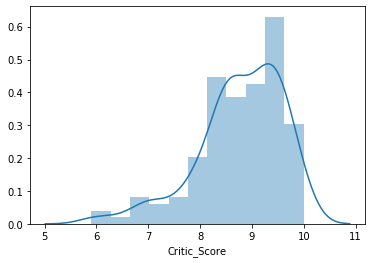

In [36]:
critic = gameData['Critic_Score']

sns.distplot(critic)

### From the result we can see that the Critic Score is not normally distributed. Most of the scores lie between 8 and 9.5.

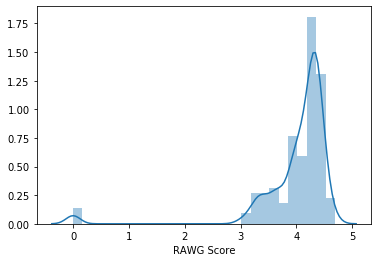

In [37]:
rawg_score = gameData['RAWG Score']
sns.distplot(rawg_score)

### Here also, the we can see that RAWG Score is not normally distributed. Most of the games in the dataframe have a score of 4.5.

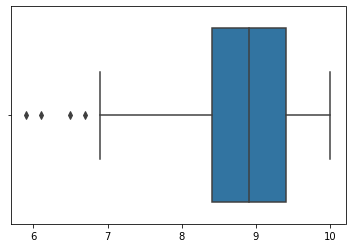

In [38]:
sns.boxplot(np.array(gameData['Critic_Score']))

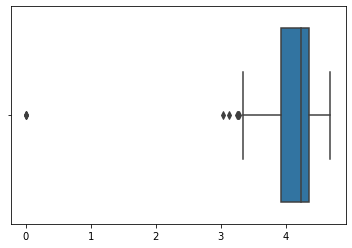

In [39]:
sns.boxplot(np.array(gameData['RAWG Score']))

## CONCEPTUAL MODEL

## Generating Tables by reformatting data

In [40]:
# Created a Game_Ratings table using the below columns
Game_Ratings = gameData.loc[:,['Id', 'RAWG Score', 'Critic_Score']]
Game_Ratings.head()

,Id,RAWG Score,Critic_Score
0,1,4.21,7.0
1,2,4.32,8.6
2,3,4.20,7.7
5,7,4.27,10.0
8,11,4.33,10.0


In [41]:
# Created a table platform details 
columns = {'Id': gameData['Id'],
          'Platform': gameData['Platform_y']}
Platform = pd.DataFrame(columns)
Platform.head()

,Id,Platform
0,1,PC
1,2,PS
2,3,Wii
5,7,NES
8,11,PC


In [42]:
# Created a table Game Details
columns = {'Id': gameData['Id'],'Name': gameData['Name'],'Description': 
               gameData["Description"],'Genre': 
               gameData["Genre"], 'Publisher': gameData['Publisher_y'],
           'Year':gameData['Year']}
Game_Details = pd.DataFrame(columns)
Game_Details.head()

,Id,Name,Description,Genre,Publisher,Year
0,1,Call of Duty,Call of Duty is a World War II first-person sh...,Shooter,Activision,2003.0
1,2,Resident Evil,The police of a small town are trying to find ...,Action,Capcom,1996.0
2,3,Wii Sports,This is what video games should be: fun for ev...,Sports,Nintendo,2006.0
5,7,Super Mario Bros.,Mario and Luigi star in their first ever Mushr...,Platform,Nintendo,1985.0
8,11,Minecraft,"One of the most popular games of the 2010s, Mi...",Misc,Mojang,2010.0


### Generating CSV files (Exporting the files to the PC)

In [43]:
Game_Ratings.to_csv('Game_Ratings.csv', encoding = 'utf-8', index = False)

In [44]:
game_ratings = pd.read_csv('Game_Ratings.csv')

In [45]:
game_ratings.head()

,Id,RAWG Score,Critic_Score
0,1,4.21,7.0
1,2,4.32,8.6
2,3,4.20,7.7
3,7,4.27,10.0
4,11,4.33,10.0


In [46]:
Game_Details.to_csv("Game_Details.csv", encoding = 'utf-8', index = False)
game_details_ = pd.read_csv('Game_Details.csv')
game_details_.head()

,Id,Name,Description,Genre,Publisher,Year
0,1,Call of Duty,Call of Duty is a World War II first-person sh...,Shooter,Activision,2003.0
1,2,Resident Evil,The police of a small town are trying to find ...,Action,Capcom,1996.0
2,3,Wii Sports,This is what video games should be: fun for ev...,Sports,Nintendo,2006.0
3,7,Super Mario Bros.,Mario and Luigi star in their first ever Mushr...,Platform,Nintendo,1985.0
4,11,Minecraft,"One of the most popular games of the 2010s, Mi...",Misc,Mojang,2010.0


In [47]:
Platform.to_csv("Platform.csv", encoding = 'utf-8', index = False)
platform = pd.read_csv('Platform.csv')
platform.head()

,Id,Platform
0,1,PC
1,2,PS
2,3,Wii
3,7,NES
4,11,PC


In [48]:
game_details = pd.merge(game_details_, 
                     platform,on = 'Id')
game_details

,Id,Name,Description,Genre,Publisher,Year,Platform
0,1,Call of Duty,Call of Duty is a World War II first-person sh...,Shooter,Activision,2003.0,PC
1,2,Resident Evil,The police of a small town are trying to find ...,Action,Capcom,1996.0,PS
2,3,Wii Sports,This is what video games should be: fun for ev...,Sports,Nintendo,2006.0,Wii
3,7,Super Mario Bros.,Mario and Luigi star in their first ever Mushr...,Platform,Nintendo,1985.0,NES
4,11,Minecraft,"One of the most popular games of the 2010s, Mi...",Misc,Mojang,2010.0,PC
...,...,...,...,...,...,...,...
127,195,Myst,And now the journey is enhanced with new artwo...,Adventure,Broderbund,1995.0,PC
128,197,Metal Gear Solid 4: Guns of the Patriots,Metal Gear Solid 4: Guns of the Patriots is a ...,Action,Konami,2008.0,PS3
129,198,Euro Truck Simulator 2,"You play as a truck driver, whose primary task...",Simulation,SCS Software,2013.0,PC
130,199,Mario Kart: Super Circuit,"Mario Kart: Super Circuit, known in Japan as M...",Racing,Nintendo,2001.0,GBA


### Combining the two datasets over a common key(id) and the data remains consistent

In [49]:
game_details_combined = pd.merge(game_details_, 
                                 game_ratings,on='Id')
game_details_combined

,Id,Name,Description,Genre,Publisher,Year,RAWG Score,Critic_Score
0,1,Call of Duty,Call of Duty is a World War II first-person sh...,Shooter,Activision,2003.0,4.21,7.0
1,2,Resident Evil,The police of a small town are trying to find ...,Action,Capcom,1996.0,4.32,8.6
2,3,Wii Sports,This is what video games should be: fun for ev...,Sports,Nintendo,2006.0,4.20,7.7
3,7,Super Mario Bros.,Mario and Luigi star in their first ever Mushr...,Platform,Nintendo,1985.0,4.27,10.0
4,11,Minecraft,"One of the most popular games of the 2010s, Mi...",Misc,Mojang,2010.0,4.33,10.0
...,...,...,...,...,...,...,...,...
127,195,Myst,And now the journey is enhanced with new artwo...,Adventure,Broderbund,1995.0,4.03,8.9
128,197,Metal Gear Solid 4: Guns of the Patriots,Metal Gear Solid 4: Guns of the Patriots is a ...,Action,Konami,2008.0,4.37,9.3
129,198,Euro Truck Simulator 2,"You play as a truck driver, whose primary task...",Simulation,SCS Software,2013.0,4.02,8.5
130,199,Mario Kart: Super Circuit,"Mario Kart: Super Circuit, known in Japan as M...",Racing,Nintendo,2001.0,3.83,9.3


### ER MODEL

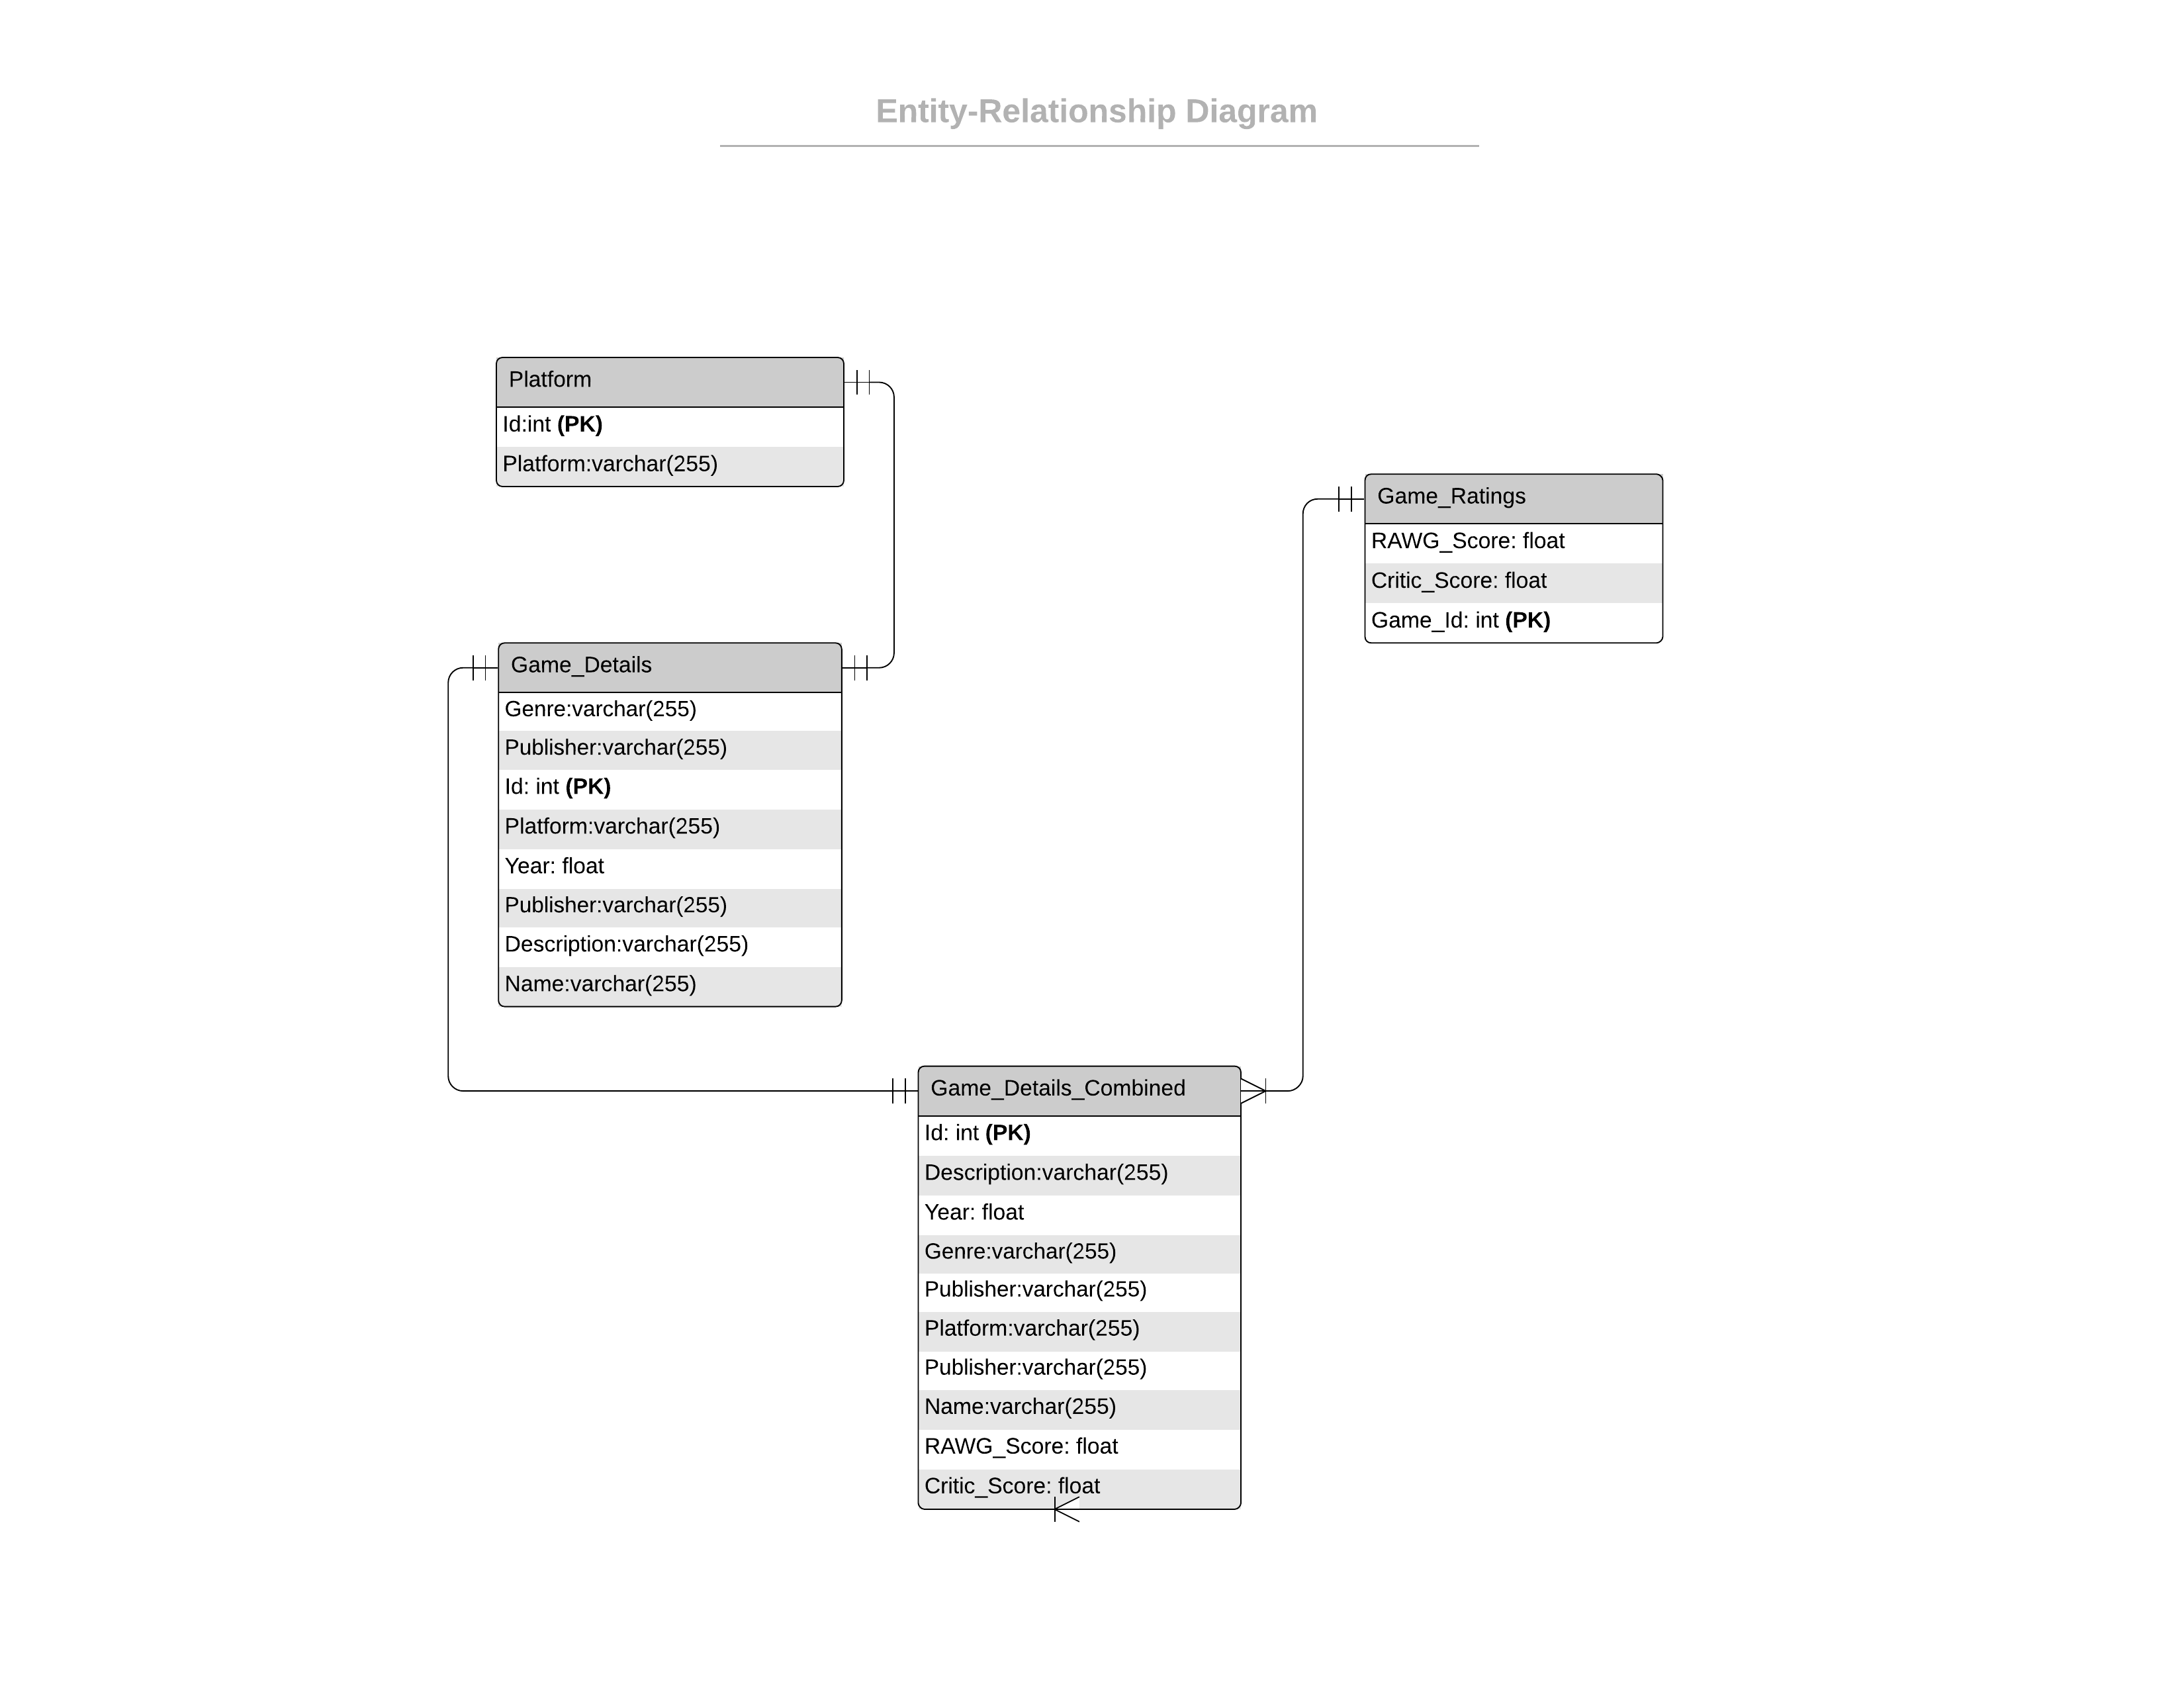

In [50]:
from IPython.display import Image
Image('VideoGameERD.png')

The above figure shows us an entity-relationship model of three different tables from the following: data from game title table,data from ratings table, data from platform table and data from other details. We can infer that id acts as a primary key, meaning that all the tables are linked with game_title. The fields title,overview,release_date,original_title
from movie_title. id holds the common data in movietitle and language. Hence, we can conclude that on merging the three tables we obtain one table which defines a combined data set of values from different places yet relatable, which is known as a conceptual database schema.

### AUDIT VALIDITY/ACCURACY

We say data is accurate only when it is neat and with no null or junk values. By using drop function, all the unwanted null values were deleted from the above rows and columns which gives a report on valid and accurate data. We have also dropped some of the columns which had large number of null values.

### AUDIT COMPLETNESS

In real world, when a list of video games from a particular customer is requested, a list of it will be displayed or presented, similarly when we compare it with above data too, we get proper real time data showing correct information for all the video games.  


### AUDIT CONSISTENCY/UNIFORMITY

The datasets which have been used in this assignment show a uniform relationship between each of the dataset since they are linked to each other by a common attribute. 

### REPORT

fies used : vgsales2019.csv                                                                         
files genearted:  Platform.csv, Game_Ratings.csv,Game_Details.csv                                      
Data is reformatted to fit into a conceptual model. Data gathered from different sources Web API, Web scraping, Raw file and are mergerd together to fit into a conceptual model.                                              

Code used:                                                                                                 
Step 1. Extraction of Data                                                                                    
3 main methods were used for the extraction of data:                                                        
1. Using the API Wrapper:                                                                                             
Here since the rawg.io is a public video game database, we won't be neeeding an API key. We will be using an API Wrapper to get the RAWG Score of each game we scraped from the website vgsales.com. We will be importing the Python API wrapper class rawgpy so as to do the same process as an API.                                                                    
pandas to create data frames from the raw data                                                                 
2. Using the website to scrap the data                                                                       
Here the data was extracted using the sites data directly using the libraries like:                               
request to access the website using the URL (http://www.vgchartz.com/gamedb/games.php?name=&keyword=&console=&region=All&developer=&publisher=&goty_year=&genre=&boxart=Both&banner=Both&ownership=Both&showmultiplat=Yes&results=200&order=Sales&showtotalsales=0&showpublisher=0&showpublisher=1&showvgchartzscore=0&shownasales=0&showdeveloper=0&showcriticscore=0&showpalsales=0&showreleasedate=0&showuserscore=0&showjapansales=0&showlastupdate=0&showothersales=0&showshipped=0)                       
BeautifulSoup to scrape the contents of the website                                                          
 find_all() and parent methods were used to find the desired content in the system                              
3. By loading the csv file:                                                                                  
Here the data was extracted using a csv file on the system using the libraries like:                            
Pandas to a read the csv file and load it into data frames                                                    
read_csv method is used to read.csv file                                                                   
Step 2. Cleaning and Auditing Data                                                                             
To gain knowledge about the dataset we used various methods like                                                  
describe, isnull, any, shape, columns, is_unique, info, iloc, loc, os


Code used for Merge  1                                                                                         
game_details = pd.merge(game_details, 
                     platform,on = 'Id')                                             
                                                                                                 
Code used for final merge                                                                                    
game_details_combined = pd.merge(game_details_, 
                                 game_ratings,on='Id')


### CONCLUSION                                                                                                                                                                   
Primary focus of this assignment is to learn how to get the data from different sources, cleaning of data, checking null values present in the data, data munging and to reformat the data to fit a conceptual database model.

### CONTRIBUTION
###### Your contribution towards project. How much code did you write and how much you took from other site or some other source.                                                                            
Ashwin John Chempolil: 15% 

Crispin Sujith Cletus: 10%

By External source: 50%                                                                                        

Provided by the professor : 25% 


### CITATIONS
##### Sources from where you have gained knowledge or used codes, data. It may include Web links, github links, code taken from somewhere etc.
http://www.vgchartz.com/gamedb/games.php?name=&keyword=&console=&region=All&developer=&publisher=&goty_year=&genre=&boxart=Both&banner=Both&ownership=Both&showmultiplat=Yes&results=200&order=Sales&showtotalsales=0&showpublisher=0&showpublisher=1&showvgchartzscore=0&shownasales=0&showdeveloper=0&showcriticscore=0&showpalsales=0&showreleasedate=0&showuserscore=0&showjapansales=0&showlastupdate=0&showothersales=0&showshipped=0                                                              
https://www.crummy.com/software/BeautifulSoup/bs4/doc/           https://github.com/GregorUT/vgchartzScrape/blob/master/vgchartzfull.py                        
https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html
https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-index-labels/
https://rawgpy.readthedocs.io/en/latest/
https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/

### LICENSE
Copyright 2019 Ashwin John Chempolil, Crispin Sujith Cletus

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
documentation files (the "Software"), to deal in the Software without restriction, including without limitation the 
rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit
persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the 
Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE 
WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR 
COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR 
OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Github: https://github.com/ashwinjohn3/WebScrapingOriginal/blob/master/Assignment1.ipynb